# 项目：WeRateDogs

## 项目背景

**项目说明：** 将要清洗 (分析和可视化) 的数据集是推特用户 @dog_rates 的档案, 也叫做 WeRateDogs。推特用户 WeRateDogs 以诙谐幽默的方式对人们的宠物狗评级。这些评级通常以 10 作为分母。但是分子呢？分子一般大于 10。 11/10、12/10、13/10 等，为什么呢？因为 "Brent 它们是好狗。" WeRateDogs 拥有四百多万关注者，曾受到国际媒体的报道。

**目标：** 清洗 WeRateDogs 推特数据，创建有趣可靠的分析和可视化。推特档案很大，但是只包括基本的推特信息。对 "Wow!" 进行收集、评估和清洗，是分析和可视化应该做的。

## 项目数据采集

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json

pd.set_option('max_colwidth', 200)  #设置Dataframe里字段最大展示字符数为200

### WeRateDogs 推特档案

In [2]:
# 下载 WeRateDogs 推特档案数据：twitter-archive-enhanced.csv
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [2]:
# 将 twitter-archive-enhanced.csv 导入一个 DataFrame 中
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 推特图片预测数据

In [4]:
# 下载 推特图片预测数据：image-predictions.tsv
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [3]:
# 将 推特图片预测数据入一个 DataFrame 中
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### Twitter API 的附加数据

In [6]:
# 下载 Twitter API 的附加数据：tweet_json.txt
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# 将 tweet_json.txt 导入一个 DataFrame 中
tweet_json = pd.read_json('tweet_json.txt', lines = True)

## 评估项目数据

### WeRateDogs 推特档案

#### 目测评估

In [5]:
# 查看 WeRateDogs 推特档案数据

twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

**质量问题：**

- 狗狗的名字清洗有问题，有大量狗狗的名字为"None"，甚至部分狗狗名字为"a"、"an"、"the"等
- 缺少转发数（retweet_count）和喜欢数（favorite_count）

**格式问题：**

- 狗狗的“地位”评级数据分散多列

#### 编程评估

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**质量问题：**

- 包含有181条转发数据

**格式问题：**

- 推特发布时间戳“timestamp”的类型不是时间类型

In [7]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**质量问题：**

- 狗狗的评分，分子清洗有问题，查看"rating_numerator"维度，发现分子最小0分，最大1776分
- 狗狗的评分，分母清洗有问题，查看"rating_denominator"维度，发现分母最小0分，最大170分

In [8]:
twitter_archive[pd.to_datetime(twitter_archive.timestamp) > pd.to_datetime('2017-08-01')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


**质量问题：**

- 包含有 2017 年 8 月 1 日之后的数据（2条）

### 推特图片预测数据

#### 目测评估

In [9]:
#查看推特图片预测数据

image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 编程评估

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


**质量问题：** 

- 缺失部分数据（WeRoteDog 推特档案2356条，推特图片预测数据2075条）

### Twitter API 的附加数据

#### 目测评估

In [11]:
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1', u'display_url': u'pic.twitter.com/MgUWQ76dJU', u'url': u'https://t.co/MgUWQ76dJU', u'media_url_htt...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892177421306343426/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892177421306343426/photo/1', u'display_url': u'pic.twitter.com/0Xxu71qeIV', u'url': u'https://t.co/0Xxu71qeIV', u'media_url_htt...",33786,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/891815181378084864/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/891815181378084864/photo/1', u'display_url': u'pic.twitter.com/wUnZnhtVJB', u'url': u'https://t.co/wUnZnhtVJB', u'media_url_htt...",25445,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/891689557279858688/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/891689557279858688/photo/1', u'display_url': u'pic.twitter.com/tD36da7qLQ', u'url': u'https://t.co/tD36da7qLQ', u'media_url_htt...",42863,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
4,NaN,NaN,2017-07-29 16:00:24,"[0,

**质量问题：**

- 推特ID命名不规范（是"id"而不是"tweet_id"）

#### 编程评估

In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

**质量问题：** 

- 包含有177条转发数据（"retweeted_status" 有177条非空记录）

In [13]:
tweet_json[tweet_json.created_at > '2017-08-01']

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1', u'display_url': u'pic.twitter.com/MgUWQ76dJU', u'url': u'https://t.co/MgUWQ76dJU', u'media_url_htt...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892177421306343426/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892177421306343426/photo/1', u'display_url': u'pic.twitter.com/0Xxu71qeIV', u'url': u'https://t.co/0Xxu71qeIV', u'media_url_htt...",33786,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."


**质量问题：**

- 包含有 2017 年 8 月 1 日之后的数据（2条）

### 评估总结

#### 质量问题

** WeRoteDog 推特档案：**

- 狗狗的名字清洗有问题，有大量狗狗的名字为"None"，甚至部分狗狗名字为"a"、"an"、"the"等
- 缺少转发数（retweet_count）和喜欢数（favorite_count）
- 包含有181条转发数据
- 狗狗的评分，分子清洗有问题，查看"rating_numerator"维度，发现分子最小0分，最大1776分
- 狗狗的评分，分母清洗有问题，查看"rating_denominator"维度，发现分母最小0分，最大170分
- 包含有 2017 年 8 月 1 日之后的数据（2条）

** 推特图片预测数据：**

- 缺失部分数据（WeRoteDog 推特档案2356条，推特图片预测数据2075条）

** Twitter API 的附加数据**

- 推特ID命名不规范（是"id"而不是"tweet_id"）
- 包含有177条转发数据（"retweeted_status" 有177条非空记录）
- 包含有 2017 年 8 月 1 日之后的数据（2条）

#### 格式问题

** WeRoteDog 推特档案：**

- 狗狗的“地位”评级数据分散多列
- 推特发布时间戳“timestamp”的类型不是时间类型

## 清洗项目数据

In [14]:
twitter_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_json.copy()

### 清洗 Twitter API 的附加数据

#### 删除2017年8月1日之后的数据

In [15]:
tweet_clean_1 = tweet_clean[tweet_clean.created_at < '2017-08-01'].copy()

In [16]:
tweet_clean_1[tweet_clean_1.created_at > '2017-08-01']

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


#### 删除转发的数据

In [17]:
tweet_clean_2 = tweet_clean_1[tweet_clean_1.retweeted_status.isnull() == True].copy()

In [18]:
tweet_clean_2[tweet_clean_2.retweeted_status.isnull() == False]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


#### 提取感兴趣的字段【推特档案编号（id）、转发数（retweet count）和喜爱数（favorite count）】

In [19]:
tweet_clean_3 = tweet_clean_2[['id','favorite_count','retweet_count']].copy()

#### 规范列名

In [20]:
tweet_clean_3.columns = ['tweet_id','favorite_count','retweet_count']

In [21]:
tweet_clean_3

,tweet_id,favorite_count,retweet_count
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721
5,891087950875897856,20548,3240
6,890971913173991426,12053,2142
7,890729181411237888,66596,19548
8,890609185150312448,28187,4403
9,890240255349198849,32467,7684
10,890006608113172480,31127,7584
11,889880896479866881,28208,5116


### 清洗 推特图片预测数据

#### 提取图片是狗狗的数据

根据"推特图片预测数据"的描述，选取预测结果第一名（p1），且预测结果为狗的数据（p1_dog = True）

In [22]:
image_p1 = image_clean[image_clean.p1_dog == True].copy()

In [23]:
image_p1.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

#### 提取感兴趣的字段【推特档案编号（tweet_id）、预测的狗狗种类（p1）】

In [24]:
image_dog = image_p1[['tweet_id','p1']].copy()

#### 修改列名

In [25]:
image_dog.columns = ['tweet_id','dog_type']

In [26]:
image_dog.head()

,tweet_id,dog_type
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


### 清洗 WeRoteDog 推特档案

#### 修正错误的数据类型（推特发布时间戳“timestamp”的类型不是时间类型）

In [27]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

In [28]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### 删除2017年8月1日之后的数据

In [29]:
twitter_clean_1 = twitter_clean[twitter_clean.timestamp < '2017-08-01'].copy()

In [30]:
twitter_clean_1[twitter_clean_1.timestamp > '2017-08-01']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 删除转发的数据

In [31]:
twitter_clean_2 = twitter_clean_1[twitter_clean_1.retweeted_status_id.isnull() == True].copy()

In [32]:
twitter_clean_2[twitter_clean_2.retweeted_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 删除不是狗狗的数据

根据已提取的图片是狗狗的“推特图片预测数据”（"image_dog"），来筛选推特档案数据

In [33]:
twitter_dog = pd.merge(twitter_clean_2,image_dog, on = 'tweet_id')

In [34]:
twitter_dog[twitter_dog.dog_type.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type


#### 重新提取狗狗的名字

In [35]:
twitter_dog['new_name'] = twitter_dog.text.str.extract('(?:This is|Meet|name is|Say hello to|named) ([A-Z][a-z]{1,12})', expand=False)

In [36]:
twitter_dog.new_name.value_counts()

Cooper       10
Charlie      10
Oliver        9
Tucker        8
Lucy          8
Daisy         7
Sadie         7
Penny         7
Koda          6
Jax           6
Winston       6
Leo           5
Rusty         5
Bella         5
Toby          5
Stanley       5
Bo            5
Maggie        4
Finn          4
Scout         4
Chester       4
Dexter        4
Scooter       4
Bear          4
Brody         4
Larry         4
Oscar         4
Cassie        4
Sophie        4
Lola          4
             ..
Kaiya         1
Tripp         1
Robin         1
Pumpkin       1
Puff          1
Alejandro     1
Cal           1
Molly         1
Mosby         1
Goose         1
Jo            1
Mya           1
Jeremy        1
Rhino         1
Rolf          1
Comet         1
Kawhi         1
Rufio         1
Gerald        1
Bonaparte     1
Walker        1
Pickles       1
Blue          1
Horace        1
Timber        1
Jett          1
Olaf          1
Kial          1
Liam          1
Loomis        1
Name: new_name, Length: 

**查看新提取的狗狗名字，基本解决狗狗的名字清洗问题**

#### 重新提取狗狗的评分

In [37]:
twitter_dog['new_rating'] = twitter_dog.text.str.extract('(\d+\.?\d?\d?/\d+)', expand = False)

In [38]:
twitter_dog.new_rating.value_counts()

12/10       380
10/10       318
11/10       307
13/10       213
9/10        107
8/10         58
7/10         24
14/10        21
6/10         12
5/10          9
4/10          4
3/10          3
88/80         1
84/70         1
60/50         1
143/130       1
80/80         1
9.75/10       1
50/50         1
2/10          1
99/90         1
1/2           1
121/110       1
45/50         1
165/150       1
11.27/10      1
13.5/10       1
11.26/10      1
44/40         1
24/7          1
4/20          1
9/11          1
Name: new_rating, dtype: int64

查看新获取的狗狗评分：
- 大部分评分以 10 作为分母，分子的取值范围在[2,13.5]区间
- 部分评分以10的倍数作为分母，分子大于分母且能被“倍数”整除（即评分"88/80"，分母为"10"的"8"倍，分子"88"能被"8"整除）
- 其余评分比较特殊，如"1/2"、"24/7"、"4/20"、"9/11"，需要查看原始推特文字信息进行分析

**对评分进行推特原文验证**

**1.对分母为"10"的评分，选取最小（2/10）和最大（13.5/10）的评分，查看推特原文描述**

In [39]:
twitter_dog[twitter_dog.new_rating == '2/10'].text

1099    This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz
Name: text, dtype: object

In [40]:
twitter_dog[twitter_dog.new_rating == '13.5/10'].text

34    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Name: text, dtype: object

**结论：** 
从推特原文可推断，分母为"10"的狗狗评分，基本属于正常评分

**2.分母为10的倍数，分子大于分母且能被“倍数”整除的评分，一共有11条，分别进行查看**

In [41]:
twitter_dog[twitter_dog.new_rating == '88/80'].text

1149    Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
Name: text, dtype: object

In [42]:
twitter_dog[twitter_dog.new_rating == '84/70'].text

262    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Name: text, dtype: object

In [43]:
twitter_dog[twitter_dog.new_rating == '60/50'].text

828    Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Name: text, dtype: object

In [44]:
twitter_dog[twitter_dog.new_rating == '143/130'].text

1015    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object

In [45]:
twitter_dog[twitter_dog.new_rating == '80/80'].text

761    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
Name: text, dtype: object

In [46]:
twitter_dog[twitter_dog.new_rating == '50/50'].text

729    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Name: text, dtype: object

In [47]:
twitter_dog[twitter_dog.new_rating == '99/90'].text

747    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Name: text, dtype: object

In [48]:
twitter_dog[twitter_dog.new_rating == '121/110'].text

1016    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object

In [49]:
twitter_dog[twitter_dog.new_rating == '45/50'].text

777    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Name: text, dtype: object

In [50]:
twitter_dog[twitter_dog.new_rating == '165/150'].text

531    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object

In [51]:
twitter_dog[twitter_dog.new_rating == '44/40'].text

888    Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
Name: text, dtype: object

从以上推特原文可知：
- "50/50"的评分值为抓取错误，因改选成后面的评分分数"11/10"
- 其余都是对一群狗狗进行集体评分，因此可以考虑拆分成平均分数来代替本条推特的评分

**编程修正分数：**

- **"50/50"的评分值修正**

In [52]:
twitter_dog.loc[729,'new_rating'] = '11/10'   #修改评分制

twitter_dog.new_rating.loc[729]               #验证最终评分结果

'11/10'

- **其余分母为10的倍数的评分值修正**

索引值|原集体评分|现平均评分
--|--|--
1149|88/80|11/10
262|84/70|12/10
828|60/50|12/10
1015|143/130|11/10
761|80/80|10/10
747|99/90|11/10
1016|121/110|11/10
777|45/50|9/10
531|165/150|11/10
888|44/40|11/10

In [53]:
index_list = [1149, 262, 828, 1015, 761, 747, 1016, 777, 531, 888]   #索引值列表
rating = ['11/10', '12/10', '12/10', '11/10', '10/10', '11/10', '11/10', '9/10', '11/10', '11/10'] #平均评分列表

# 根据索引值进行评分修改

for i in range(len(index_list)):
    twitter_dog.loc[index_list[i],'new_rating'] = rating[i]

**3.特殊评分有4条，分别是："1/2"、"24/7"、"4/20"、"9/11"。分别进行查看**

- 查看评分为"1/2"的推特原文

In [54]:
twitter_dog[twitter_dog.new_rating == '1/2'].text

1459    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

从推特原文可知，"1/2"是描述狗狗腿的状态，真实的评分是"9/10"。编程修正如下：

In [55]:
twitter_dog.loc[1459,'new_rating'] = '9/10'   #修改评分制

twitter_dog.new_rating.loc[1459]              #验证最终评分结果

'9/10'

- 查看评分为"24/7"的推特原文

In [56]:
twitter_dog[twitter_dog.new_rating == '24/7'].text

311    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object

从推特原文可知，"24/7"是描述狗狗7*24小时的笑容，不是评分。推特原文里没有对狗狗进行评分，所以评分应该为零。编程修正如下：

In [57]:
twitter_dog.loc[311,'new_rating'] = 0    #修改评分制

twitter_dog.new_rating.loc[311]          #验证最终评分结果

0

- 查看评分为"4/20"的推特原文

In [58]:
twitter_dog[twitter_dog.new_rating == '4/20'].text

701    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Name: text, dtype: object

从推特原文可知，"4/20"是描述4月2日这个日期，真实的评分是"13/10"。编程修正如下：

In [59]:
twitter_dog.loc[701,'new_rating'] = '13/10'    #修改评分制

twitter_dog.new_rating.loc[701]                #验证最终评分结果

'13/10'

- 查看评分为"9/11"的推特原文

In [60]:
twitter_dog[twitter_dog.new_rating == '9/11'].text

632    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Name: text, dtype: object

从推特原文可知，"9/11"不是狗狗的评分，是指911事件。真实的评分是"14/10"。编程修正如下：

In [61]:
twitter_dog.loc[632,'new_rating'] = '14/10'    #修改评分制

twitter_dog.new_rating.loc[632]                #验证最终评分结果

'14/10'

**查看清洗后的评分情况**

In [62]:
twitter_dog.new_rating.value_counts()

12/10       382
10/10       319
11/10       314
13/10       214
9/10        109
8/10         58
7/10         24
14/10        22
6/10         12
5/10          9
4/10          4
3/10          3
13.5/10       1
11.27/10      1
9.75/10       1
2/10          1
11.26/10      1
0             1
Name: new_rating, dtype: int64

狗狗的评分已经全部转换成分母为"10"的评分，这个时候保留分母已经没有太大意义且不利于后续的分析可视化，因此只保留分子作为评分值

In [63]:
# 删除分母（删除"/10"）

twitter_dog.new_rating.replace('/\d+','',regex = True, inplace = True)

In [64]:
# 把评分类型转换为浮点型

twitter_dog.new_rating = twitter_dog.new_rating.astype('float')

In [65]:
# 验证转换后的成果

twitter_dog.new_rating.value_counts()

12.00    382
10.00    319
11.00    314
13.00    214
9.00     109
8.00      58
7.00      24
14.00     22
6.00      12
5.00       9
4.00       4
3.00       3
13.50      1
11.27      1
0.00       1
11.26      1
2.00       1
9.75       1
Name: new_rating, dtype: int64

#### 重新提取狗狗的“地位”评级数据

In [66]:
stage_list = ['doggo','floofer','pupper','puppo']
twitter_dog.reset_index(drop = True, inplace = True)
twitter_dog['new_stages'] = ''

for i in range(len(twitter_dog)):      
    for status in stage_list:
        if status in twitter_dog.text[i]:
            twitter_dog.loc[i,'new_stages'] += status

In [67]:
twitter_dog.new_stages.value_counts()

               1238
pupper          155
doggo            48
puppo            23
doggopupper       7
floofer           3
doggopuppo        2
Name: new_stages, dtype: int64

查看新获取的狗狗的地位评级：

- 获得"doggo" + "pupper"地位评级的有7条数据，编程修改成"doggo/pupper"
- 获得"doggo" + "puppo"地位评级的有2条数据，编程修改成"doggo/puppo"

In [68]:
twitter_dog.new_stages.replace('doggopupper', 'doggo/pupper', inplace = True)
twitter_dog.new_stages.replace('doggopuppo', 'doggo/puppo', inplace = True)

In [69]:
# 验证修改后的结果

twitter_dog.new_stages.value_counts()

                1238
pupper           155
doggo             48
puppo             23
doggo/pupper       7
floofer            3
doggo/puppo        2
Name: new_stages, dtype: int64

#### 提取感兴趣的字段

In [70]:
# 查看字段信息

twitter_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 21 columns):
tweet_id                      1476 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1476 non-null datetime64[ns]
source                        1476 non-null object
text                          1476 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1476 non-null object
rating_numerator              1476 non-null int64
rating_denominator            1476 non-null int64
name                          1476 non-null object
doggo                         1476 non-null object
floofer                       1476 non-null object
pupper                        1476 non-null object
puppo                         1476 non-null object
dog_type                      

In [71]:
twitter_dog_clean = twitter_dog[['tweet_id', 'timestamp', 'dog_type', 'new_name', 'new_rating', 'new_stages']].copy()

#### 修改列名

In [72]:
twitter_dog_clean.columns = ['tweet_id', 'times', 'dog_type', 'name', 'rating', 'stages']

In [73]:
# 查看修改效果

twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 6 columns):
tweet_id    1476 non-null int64
times       1476 non-null datetime64[ns]
dog_type    1476 non-null object
name        1059 non-null object
rating      1476 non-null float64
stages      1476 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 69.3+ KB


### 合并清洗后的数据

In [74]:
twitter_archive_master =  pd.merge(twitter_dog_clean,tweet_clean_3, on = 'tweet_id')

In [75]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 0 to 1475
Data columns (total 8 columns):
tweet_id          1476 non-null int64
times             1476 non-null datetime64[ns]
dog_type          1476 non-null object
name              1059 non-null object
rating            1476 non-null float64
stages            1476 non-null object
favorite_count    1476 non-null int64
retweet_count     1476 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 103.8+ KB


In [76]:
twitter_archive_master

,tweet_id,times,dog_type,name,rating,stages,favorite_count,retweet_count
0,891815181378084864,2017-07-31 00:18:03,Chihuahua,Archie,12.0,,25445,4301
1,891327558926688256,2017-07-29 16:00:24,basset,Franklin,12.0,,41016,9721
2,891087950875897856,2017-07-29 00:08:17,Chesapeake_Bay_retriever,NaN,13.0,,20548,3240
3,890971913173991426,2017-07-28 16:27:12,Appenzeller,Jax,13.0,,12053,2142
4,890729181411237888,2017-07-28 00:22:40,Pomeranian,NaN,13.0,,66596,19548
5,890609185150312448,2017-07-27 16:25:51,Irish_terrier,Zoey,13.0,,28187,4403
6,890240255349198849,2017-07-26 15:59:51,Pembroke,Cassie,14.0,doggo,32467,7684
7,890006608113172480,2017-07-26 00:31:25,Samoyed,Koda,13.0,,31127,7584
8,889880896479866881,2017-07-25 16:11:53,French_bulldog,Bruno,13.0,,28208,5116
9,889665388333682689,2017-07-25 01:55:32,Pembroke,NaN,13.0,puppo,38745,8502


### 数据导出

将收集、评估和清理过的主数据集保存到 CSV 文

In [77]:
twitter_archive_master.to_csv('./twitter_archive_master.csv')

## 主数据集分析

处理过的主数据集共有8个维度变量：
- tweet_id：推特发文编号
- times：推特发文时间
- dog_type：狗狗的种类
- name：狗狗的名字
- rating：狗狗获得的评分
- stages：狗狗获得的“地位”评级
- favorite_count：推特发文获得的喜爱数
- retweet_coun：推特发文获得的转发数

分析不同种类的狗狗获得的评分、喜爱数以及转发数的情况

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 不同种类狗狗的数量统计

#### 不同种类狗狗的数量统计TOP10

In [79]:
twitter_archive_master.dog_type.value_counts()[0:10]

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             38
malamute               29
Name: dog_type, dtype: int64

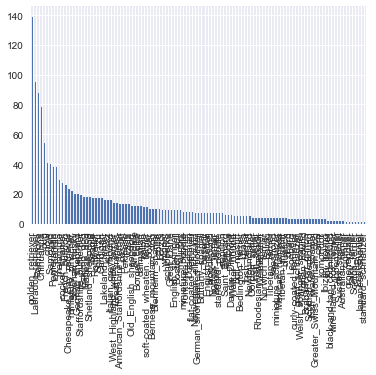

In [81]:
twitter_archive_master.dog_type.value_counts().plot(kind = 'bar')

### 不同种类狗狗的评分分析

#### 参与评分的狗狗，总评分TOP10

In [82]:
twitter_archive_master.groupby('dog_type').sum()[['rating']].sort_values(ascending = False,by = 'rating')[0:10]

,rating
dog_type,
golden_retriever,1605.50
Labrador_retriever,1057.00
Pembroke,1007.00
Chihuahua,833.00
pug,553.00
chow,476.00
Samoyed,468.00
Pomeranian,423.75
toy_poodle,422.00


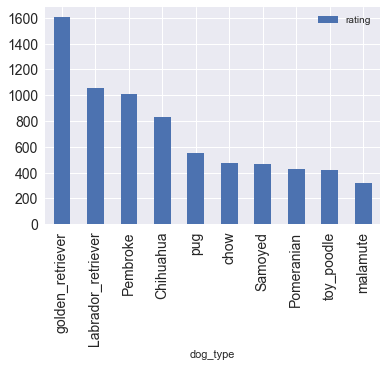

In [83]:
twitter_archive_master.groupby('dog_type').sum()[['rating']].sort_values(ascending = False,by = 'rating')[0:10].plot(kind = 'bar',fontsize = '14')

#### 参与评分的狗狗，评分最高的前10名的种类

In [100]:
# 查看获得最高分的狗狗数量

twitter_archive_master.rating.value_counts()

12.00    382
10.00    319
11.00    314
13.00    214
9.00     109
8.00      58
7.00      24
14.00     22
6.00      12
5.00       9
4.00       4
3.00       3
13.50      1
11.27      1
0.00       1
11.26      1
2.00       1
9.75       1
Name: rating, dtype: int64

In [101]:
# 获得最高分（14分）的狗狗，按种类统计数量并排序

dog_rating_top = twitter_archive_master[twitter_archive_master.rating == 14.0].groupby('dog_type').count().sort_values(ascending = False, by = 'rating')

dog_rating_top

,tweet_id,times,name,rating,stages,favorite_count,retweet_count
dog_type,,,,,,,
Pembroke,4,4,2,4,4,4,4
golden_retriever,3,3,1,3,3,3,3
French_bulldog,2,2,2,2,2,2,2
Bedlington_terrier,1,1,1,1,1,1,1
Chihuahua,1,1,1,1,1,1,1
Eskimo_dog,1,1,0,1,1,1,1
Gordon_setter,1,1,0,1,1,1,1
Irish_setter,1,1,1,1,1,1,1
Lakeland_terrier,1,1,0,1,1,1,1


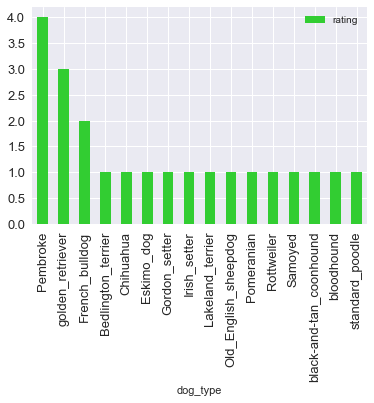

In [122]:
dog_rating_top.plot(kind = 'bar', x = dog_rating_top.index, y = 'rating', fontsize = '13', color = 'limegreen')

In [112]:
sns.barplot(data = 'dog_rating_top', x = dog_rating_top.index, y = 'rating')

AttributeError: 'str' object has no attribute 'get'

#### 参与评分的狗狗，平均评分TOP10

In [123]:
twitter_archive_master.groupby('dog_type').mean()[['rating']].sort_values(ascending = False,by = 'rating')[0:10]

,rating
dog_type,
Saluki,12.500000
briard,12.333333
Tibetan_mastiff,12.250000
Border_terrier,12.142857
silky_terrier,12.000000
standard_schnauzer,12.000000
giant_schnauzer,12.000000
Eskimo_dog,11.777778
Gordon_setter,11.750000


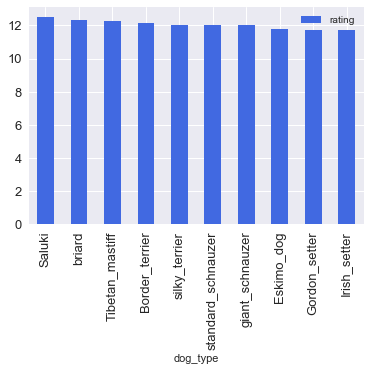

In [125]:
twitter_archive_master.groupby('dog_type').mean()[['rating']].sort_values(ascending = False,by = 'rating')[0:10].plot(kind = 'bar', fontsize = '13', color = 'royalblue')

### 不同种类狗狗的喜爱数分析

#### 不同种类狗狗，总喜欢数TOP10

In [127]:
twitter_archive_master.groupby('dog_type').sum()[['favorite_count']].sort_values(ascending = False, by='favorite_count')[0:10]

,favorite_count
dog_type,
golden_retriever,1707334.0
Labrador_retriever,1119555.0
Pembroke,991762.0
Chihuahua,640201.0
Samoyed,541345.0
French_bulldog,464224.0
chow,414190.0
pug,319099.0
cocker_spaniel,314695.0


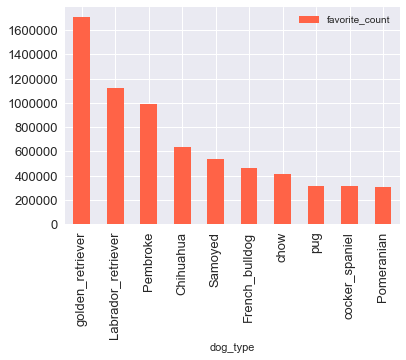

In [128]:
twitter_archive_master.groupby('dog_type').sum()[['favorite_count']].sort_values(ascending = False, by='favorite_count')[0:10].plot(kind = 'bar', fontsize = '13', color = 'tomato')

#### 不同种类狗狗，平均喜爱数TOP10

In [129]:
twitter_archive_master.groupby('dog_type').mean()[['favorite_count']].sort_values(ascending = False, by='favorite_count')[0:10]

,favorite_count
dog_type,
Saluki,23996.250000
French_bulldog,17854.769231
Afghan_hound,17250.666667
black-and-tan_coonhound,16952.500000
flat-coated_retriever,16731.625000
Irish_water_spaniel,16335.333333
standard_poodle,15732.142857
English_springer,15631.222222
Cardigan,15251.705882


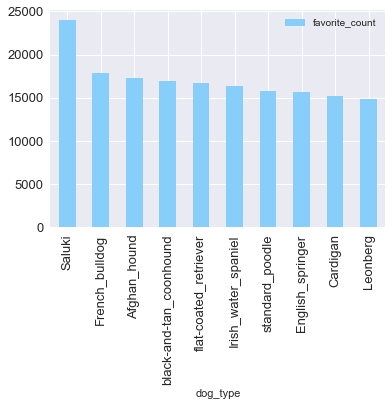

In [130]:
twitter_archive_master.groupby('dog_type').mean()[['favorite_count']].sort_values(ascending = False, by='favorite_count')[0:10].plot(kind = 'bar', fontsize = '13', color = 'lightskyblue')

### 不同种类狗狗的转发数分析

#### 不同种类狗狗，总转发数TOP10

In [131]:
twitter_archive_master.groupby('dog_type').sum()[['retweet_count']].sort_values(ascending = False, by='retweet_count')[0:10]

,retweet_count
dog_type,
golden_retriever,505153.0
Labrador_retriever,364632.0
Pembroke,278975.0
Chihuahua,213041.0
Samoyed,183897.0
French_bulldog,121066.0
chow,118926.0
Pomeranian,108798.0
cocker_spaniel,100024.0


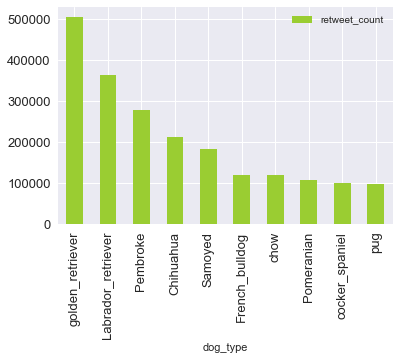

In [133]:
twitter_archive_master.groupby('dog_type').sum()[['retweet_count']].sort_values(ascending = False, by='retweet_count')[0:10].plot(kind = 'bar', fontsize = '13', color = 'yellowgreen')

#### 不同种类狗狗， 平均转发数TOP10

In [134]:
twitter_archive_master.groupby('dog_type').mean()[['retweet_count']].sort_values(ascending = False, by='retweet_count')[0:10]

,retweet_count
dog_type,
standard_poodle,6602.142857
English_springer,5948.666667
Afghan_hound,5946.000000
Saluki,5103.250000
Eskimo_dog,4742.444444
Great_Pyrenees,4704.000000
French_bulldog,4656.384615
Samoyed,4597.425000
Cardigan,4513.647059


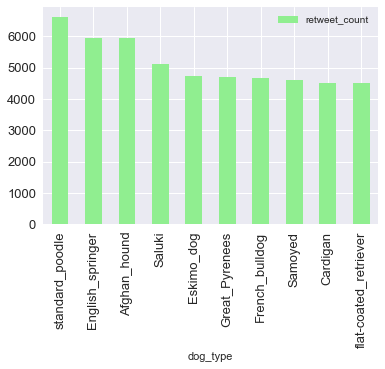

In [135]:
twitter_archive_master.groupby('dog_type').mean()[['retweet_count']].sort_values(ascending = False, by='retweet_count')[0:10].plot(kind = 'bar', fontsize = '13', color = 'lightgreen')